In [352]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import pandas as pd

In [353]:
X,y=sklearn.datasets.make_blobs(n_samples=200,centers=2,n_features=2,center_box=(1,10),random_state=40)

In [354]:
X

array([[ 3.6167052 ,  1.57961746],
       [ 7.92676273,  3.28040394],
       [ 6.45429488,  2.47523512],
       [ 4.70091004,  2.77093422],
       [ 3.36656555,  1.33146869],
       [ 4.78367315,  1.58635772],
       [ 4.89381711,  1.81561391],
       [ 8.44369848,  3.12828314],
       [ 3.55711828,  1.47759158],
       [ 7.86322938,  3.45887831],
       [ 8.39902634,  3.03185147],
       [ 6.69997146,  6.09404787],
       [ 8.84523663,  2.85576568],
       [ 8.7365403 ,  2.33823657],
       [ 3.82301285,  1.06486544],
       [ 8.31114697,  3.88364617],
       [ 3.65217623,  1.36460133],
       [ 7.57811248,  3.56819424],
       [ 2.82113271,  1.67084343],
       [ 3.17706866,  2.1099599 ],
       [ 8.62870471,  3.96509142],
       [ 7.9369443 ,  1.9948313 ],
       [ 7.84275581,  2.77467325],
       [ 4.93801462, -0.24308284],
       [ 4.69925939,  0.39037919],
       [ 8.05493579,  3.93770519],
       [ 8.10485227,  2.58149988],
       [ 7.61121627,  2.60602905],
       [ 7.51571628,

In [355]:
y

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0])

In [356]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


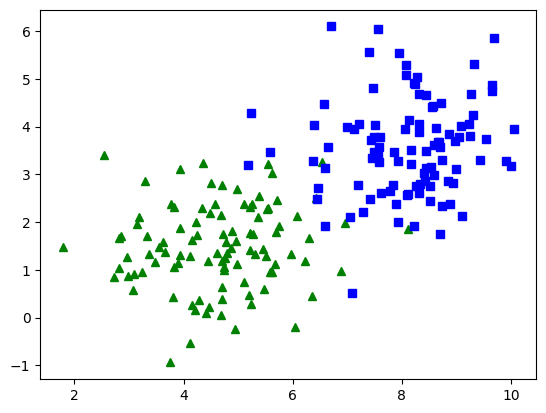

In [357]:
plt.plot(X[:,0][y==0],X[:,1][y==0],'g^')
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.show()

In [358]:
learning_rate=1e-4
learning_rate

0.0001

In [359]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [360]:
def forward(x,w):
    z=np.matmul(x,w)
    return z


In [361]:
#enumerate
# a=[1,2,3]
# for a,b in enumerate(a):
#     print(a,b)

In [362]:
# y_hat=[1,8.9,3.8,4]
# y=[0.2,0.9,0.4,0.78]
# y[0]
# for index,val in enumerate(y_hat):
#     predicted=val
#     actual_ko_index=index
#     y_ko_value=y[index]
#     print(actual_ko_index,predicted,y_ko_value)

In [363]:
# def loss_(y_hat:list,y:list):
#     loss=0
#     for index,val in enumerate(y_hat):
#         predicted=val
#         actual=y[index]
#         loss-=(actual*np.log(val)+(1-actual)*np.log(1-predicted))           enumerate reteurns the index and value of the index of the list
#     loss=loss/ y.shape
#     return float(loss)
def loss_(y_hat: list, y: list):
  loss=0
  for index,val in enumerate(y_hat):
      predicted = val
      actual=y[index]
      loss-=(actual*np.log(val)+(1-actual)*np.log(1-predicted))
  loss = loss/ len(y)
  return float(loss)

In [364]:
# y_hat = [0.9, 0.2, 0.8, 0.1]
# y     = [1,   0,   1,   0]

# loss_(y_hat,y)

In [365]:
# y.shape[0]
# len(y)

In [366]:
def backpropagation(x,y,epochs,w):
    for i in range(epochs):
        z=forward(x,w)
        y_hat=sigmoid(z)
        dl_dy_hat=-(y/y_hat -(1-y)/(1-y_hat))
        dy_hat_dz=y_hat*(1-y_hat)
        dl_dz=dl_dy_hat*dy_hat_dz
        dl_dw=np.matmul(x.T,dl_dz)
        w=w-learning_rate*(dl_dw)
        print(f'Loss at {i} is {loss_(y_hat,y):.3f}')
    return w

In [378]:
w=np.random.rand(3,1)
w

array([[0.46342776],
       [0.15889426],
       [0.53333613]])

In [379]:
ones_=np.ones((X.shape[0],1))
ones_

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [380]:
ones_.shape

(200, 1)

In [381]:
x=np.concatenate((ones_,X),axis=1)
x

array([[ 1.        ,  3.6167052 ,  1.57961746],
       [ 1.        ,  7.92676273,  3.28040394],
       [ 1.        ,  6.45429488,  2.47523512],
       [ 1.        ,  4.70091004,  2.77093422],
       [ 1.        ,  3.36656555,  1.33146869],
       [ 1.        ,  4.78367315,  1.58635772],
       [ 1.        ,  4.89381711,  1.81561391],
       [ 1.        ,  8.44369848,  3.12828314],
       [ 1.        ,  3.55711828,  1.47759158],
       [ 1.        ,  7.86322938,  3.45887831],
       [ 1.        ,  8.39902634,  3.03185147],
       [ 1.        ,  6.69997146,  6.09404787],
       [ 1.        ,  8.84523663,  2.85576568],
       [ 1.        ,  8.7365403 ,  2.33823657],
       [ 1.        ,  3.82301285,  1.06486544],
       [ 1.        ,  8.31114697,  3.88364617],
       [ 1.        ,  3.65217623,  1.36460133],
       [ 1.        ,  7.57811248,  3.56819424],
       [ 1.        ,  2.82113271,  1.67084343],
       [ 1.        ,  3.17706866,  2.1099599 ],
       [ 1.        ,  8.62870471,  3.965

In [382]:
a=[[1,2,3]]
b=[[4,5,6]]
print(np.concatenate((a,b),axis=0))

[[1 2 3]
 [4 5 6]]


In [383]:
r=np.array([200,122])
r=r.reshape(r.shape[0],1)
r

array([[200],
       [122]])

In [384]:
y.shape[0]

200

In [385]:
y=y.reshape(y.shape[0],1)

In [386]:
y

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [387]:
y.shape

(200, 1)

In [388]:
model=backpropagation(x,y,100,w)

Loss at 0 is 1.084
Loss at 1 is 1.002
Loss at 2 is 0.928
Loss at 3 is 0.864
Loss at 4 is 0.810
Loss at 5 is 0.767
Loss at 6 is 0.734
Loss at 7 is 0.709
Loss at 8 is 0.691
Loss at 9 is 0.679
Loss at 10 is 0.671
Loss at 11 is 0.665
Loss at 12 is 0.662
Loss at 13 is 0.659
Loss at 14 is 0.658
Loss at 15 is 0.656
Loss at 16 is 0.655
Loss at 17 is 0.655
Loss at 18 is 0.654
Loss at 19 is 0.654
Loss at 20 is 0.653
Loss at 21 is 0.653
Loss at 22 is 0.652
Loss at 23 is 0.652
Loss at 24 is 0.651
Loss at 25 is 0.651
Loss at 26 is 0.651
Loss at 27 is 0.650
Loss at 28 is 0.650
Loss at 29 is 0.649
Loss at 30 is 0.649
Loss at 31 is 0.649
Loss at 32 is 0.648
Loss at 33 is 0.648
Loss at 34 is 0.647
Loss at 35 is 0.647
Loss at 36 is 0.647
Loss at 37 is 0.646
Loss at 38 is 0.646
Loss at 39 is 0.645
Loss at 40 is 0.645
Loss at 41 is 0.645
Loss at 42 is 0.644
Loss at 43 is 0.644
Loss at 44 is 0.643
Loss at 45 is 0.643
Loss at 46 is 0.643
Loss at 47 is 0.642
Loss at 48 is 0.642
Loss at 49 is 0.642
Loss at 50

/var/folders/vy/fch6w1_x1l75t7_9zqnljtt80000gn/T/ipykernel_75214/1710672224.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(loss)
